In [1]:
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_csv("quotes_with_tags.csv")

In [4]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [5]:
df['sentiment_score'] = df['quote'].apply(get_sentiment)

In [6]:
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

In [7]:
df[['quote', 'sentiment_score', 'sentiment_label']].head()

,quote,sentiment_score,sentiment_label
0,“The world as we have created it is a process ...,0.000000,Neutral
1,"“It is our choices, Harry, that show what we t...",0.300000,Positive
2,“There are only two ways to live your life. On...,0.003788,Positive
3,"“The person, be it gentleman or lady, who has ...",-0.050000,Negative
4,"“Imperfection is beauty, madness is genius and...",-0.277778,Negative


In [8]:
df['sentiment_label'].value_counts()

sentiment_label
Positive    6
Neutral     2
Negative    2
Name: count, dtype: int64

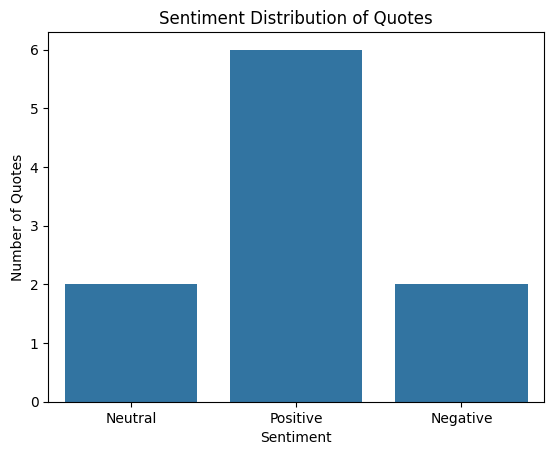

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment_label', data=df)
plt.title("Sentiment Distribution of Quotes")
plt.xlabel("Sentiment")
plt.ylabel("Number of Quotes")
plt.show()